In [2]:
# NiN 网络中的网络

In [1]:
# 卷积层需要较少的参数
# c_i*c_o*k^2
# 全连接层需要大量的参数
# 容易过拟合

In [3]:
# 大量的时间消耗在不断访问参数
# 大量正则化,不然有全连接层会记忆全部特征
# NiN 卷积层代替全连接层
# 现在 全连接层重新替代卷积层

In [4]:
# 用1*1的卷积层代替全连接层
# 共享参数的全连接层
# 减少参数的好办法
# 步幅1，无填充，输出形状不变
# 起到全连接层的作用

In [5]:
# NiN架构
# 交替使用NiN块和步幅为2的最大池化层
# --逐步减少宽高和增加通道数
# 最后使用全局平均池化层得到输出
# --其输出通道是类别数

In [6]:
# NiN块(深度的极限)
# NiN块使用卷积层加两个1*1卷积层
# 后者对每个像素增加了非线性性
# NiN使用全局平均池化层代替全连接层
# --不容易过拟合，更少的参数个数

In [7]:
import torch 
from torch import nn 
from d2l import torch as d2l 

In [10]:
# NiN块
def nin_block(
    in_channels,out_channels,kernel_size,strides,padding
):
    return nn.Sequential(
        nn.Conv2d(in_channels,out_channels,kernel_size,strides,padding),
        nn.ReLU(),
        nn.Conv2d(out_channels,out_channels,kernel_size=1),
        nn.ReLU(),
        nn.Conv2d(out_channels,out_channels,kernel_size=1),
        nn.ReLU(),
    )

In [11]:
# NiN模型
net=nn.Sequential(
    nin_block(1,96,kernel_size=11,strides=4,padding=0),
    nn.MaxPool2d(3,stride=2),
    nin_block(96,256,kernel_size=5,strides=1,padding=2),
    nn.MaxPool2d(3,stride=2),
    nin_block(256,384,kernel_size=3,strides=1,padding=1),
    nn.MaxPool2d(3,stride=2),
    nn.Dropout(0.5),
    nin_block(384,10,kernel_size=3,strides=1,padding=1),
    nn.AdaptiveAvgPool2d((1,1)),
    nn.Flatten(),
)
# 构架数据来源于AlexNet

In [12]:
X=torch.rand((1,1,224,224))
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,"outpot shape:",X.shape)

Sequential outpot shape: torch.Size([1, 96, 54, 54])
MaxPool2d outpot shape: torch.Size([1, 96, 26, 26])
Sequential outpot shape: torch.Size([1, 256, 26, 26])
MaxPool2d outpot shape: torch.Size([1, 256, 12, 12])
Sequential outpot shape: torch.Size([1, 384, 12, 12])
MaxPool2d outpot shape: torch.Size([1, 384, 5, 5])
Dropout outpot shape: torch.Size([1, 384, 5, 5])
Sequential outpot shape: torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d outpot shape: torch.Size([1, 10, 1, 1])
Flatten outpot shape: torch.Size([1, 10])


In [13]:
# DropOut 在卷积层很奇怪
# 如果把1*1视为全连接可以这样用
# 在training中还需要一个softmax
# 在输出层替代全连接(AveragePooling)
# 而不是替代softmax

loss 0.363, train acc 0.868, test acc 0.874
1037.0 examples/sec on cuda:0


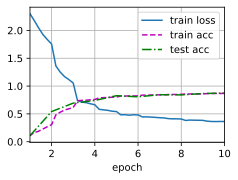

In [14]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())


In [16]:
# 速度和精度比AlexNet 都不怎么样
# 在ImageNet中取得过比较好的成绩
# 全局池化的好处主要是降低模型复杂度
# 提升泛化性
# 坏处:收敛变慢(如果后面还有全连接层)
# 训练久但精度高

In [17]:
# 减少一层1*1卷积
def nin_block(
    in_channels, out_channels, kernel_size, strides, padding
):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1),
        nn.ReLU(),
    )


In [18]:
# NiN模型
net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, strides=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, strides=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, strides=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(0.5),
    nin_block(384, 10, kernel_size=3, strides=1, padding=1),
    nn.AdaptiveAvgPool2d((1, 1)),
    nn.Flatten(),
)
# 构架数据来源于AlexNet


loss 0.301, train acc 0.890, test acc 0.882
1437.4 examples/sec on cuda:0


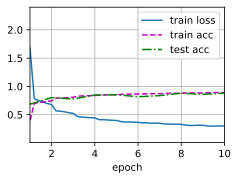

In [19]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())


In [20]:
# 增加一层1*1卷积
def nin_block(
    in_channels, out_channels, kernel_size, strides, padding
):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1),
        nn.ReLU(),
    )


In [21]:
# NiN模型
net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, strides=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, strides=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, strides=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(0.5),
    nin_block(384, 10, kernel_size=3, strides=1, padding=1),
    nn.AdaptiveAvgPool2d((1, 1)),
    nn.Flatten(),
)
# 构架数据来源于AlexNet


loss 0.417, train acc 0.844, test acc 0.821
840.4 examples/sec on cuda:0


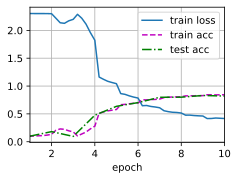

In [22]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [ ]:
# 1*1对像素增加的非线性性
# 两个类全连接，两个ReLU()增加了非线性性
# 预测完记得拷贝